# Flownet results on Tango PDK data

I generated data using a stationary Project Tango device on a stationary platform and moved a Curious George jack-in-the-box. I then ran the caffe-based flownet code on the data using the following commands.

First, I pulled the data off of the device and converted them to ppms for input into caffe/flownet.

## Convert JPEGs to PPMs

```bash
COUNTER=0
for i in $(ls *.jpg);
do
    printf -v j "%02d" ${COUNTER}
    convert ${i} ${j}.ppm
    let COUNTER=${COUNTER}+1
done
```

## Run Flownet

```bash
for i in $(seq 0 12);
do
    let j=${i}+1;
    printf -v k "%02d" ${i};
    printf -v l "%02d" ${j};
    ~/anaconda/bin/python demo_flownets.py \
      ~/Projects/UNC/comp992/tango-images/better_collection/ppms/${k}.ppm \
      ~/Projects/UNC/comp992/tango-images/better_collection/ppms/${l}.ppm \
    cp results/0000000.flo ~/Projects/UNC/comp992/tango-images/better_collection/results/${k}-${l}.flo
done
```

## Convert FLOs to PNGs

```bash
for i in $(ls *.flo);
do
    ~/Projects/UNC/comp992/flow-code/color_flow ${i} ${i%.flo}.png
done
```

## Results

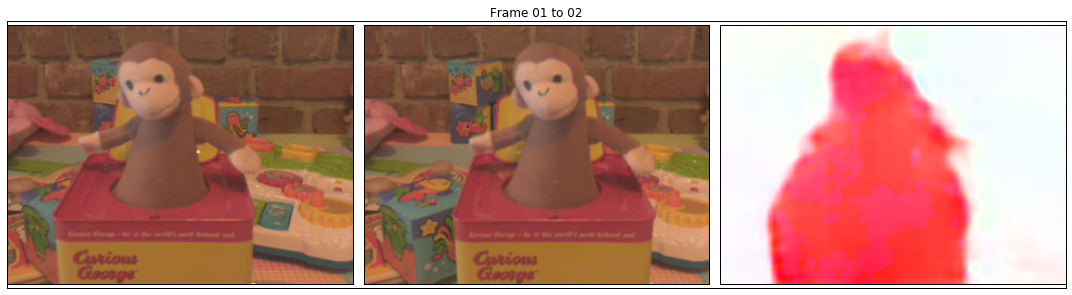

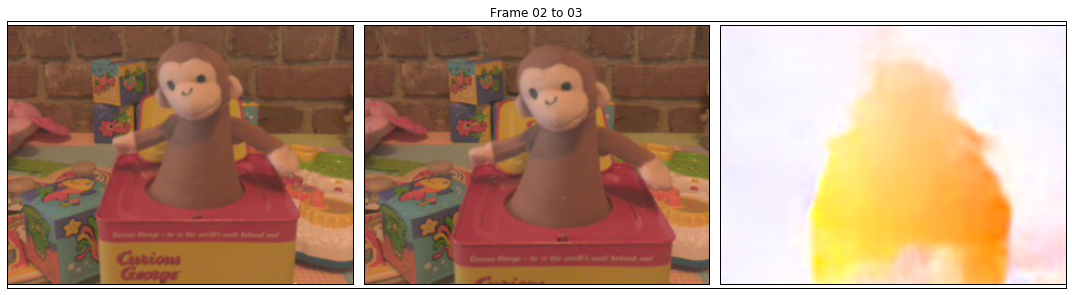

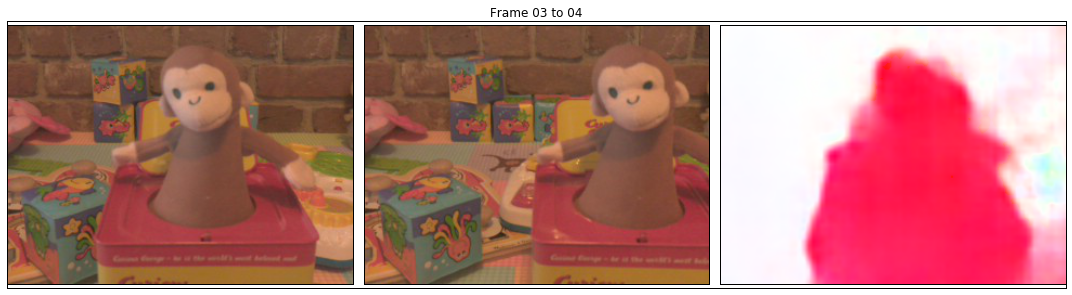

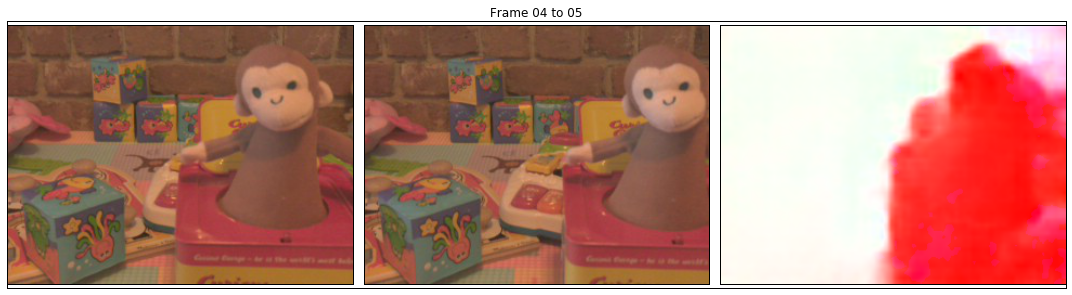

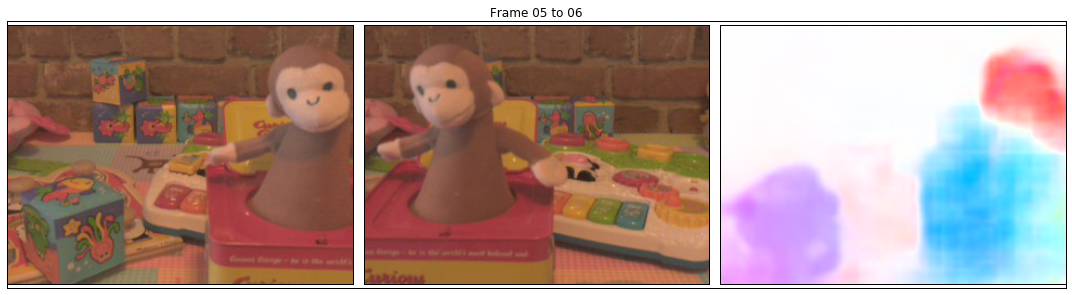

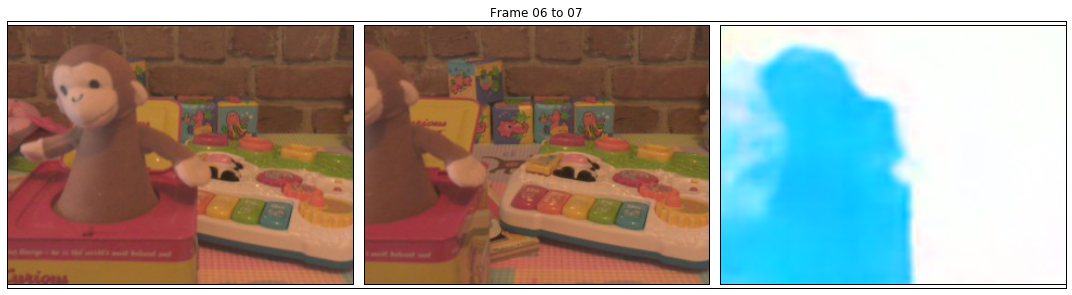

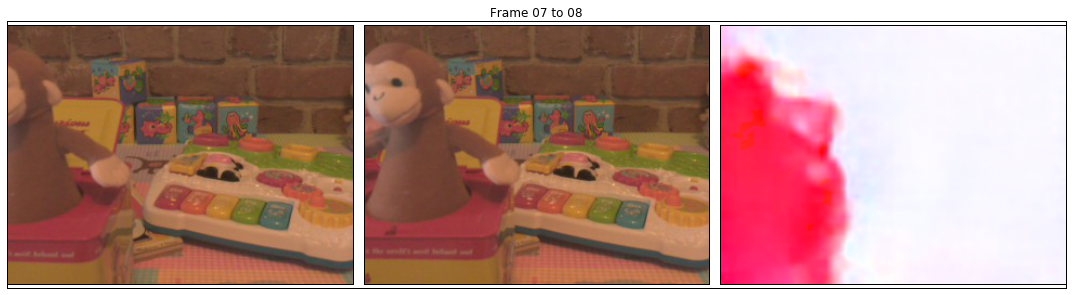

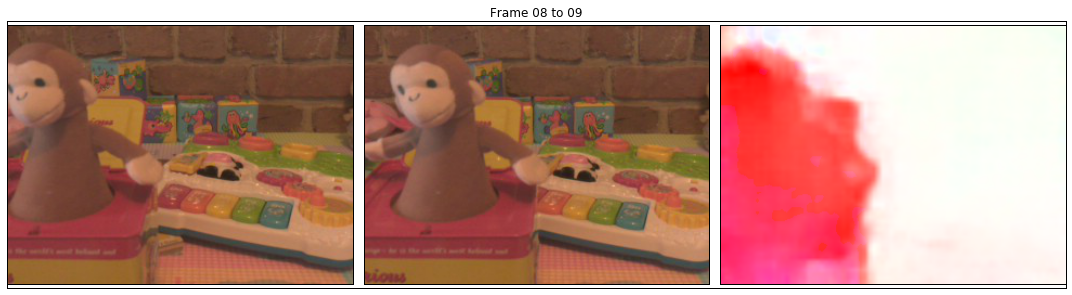

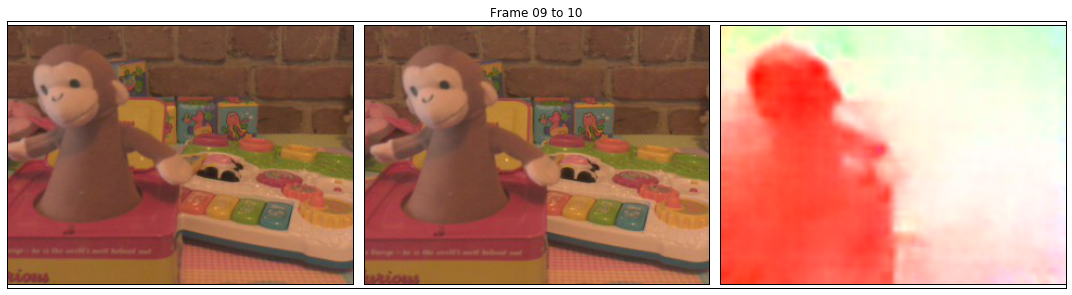

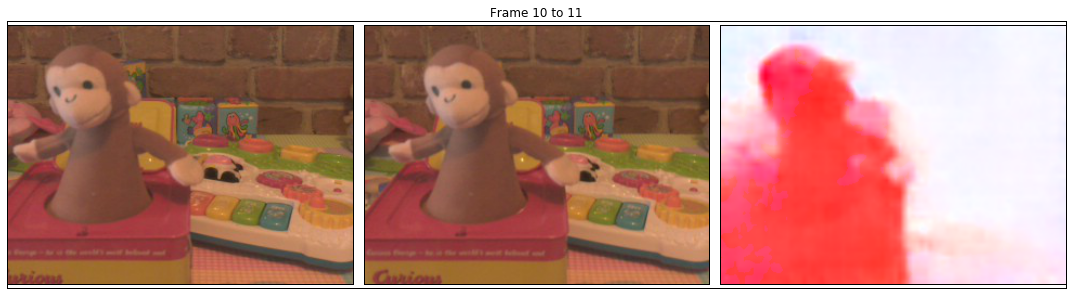

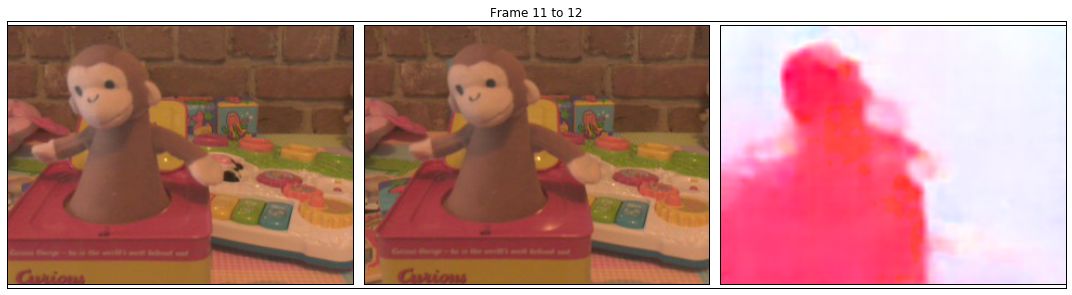

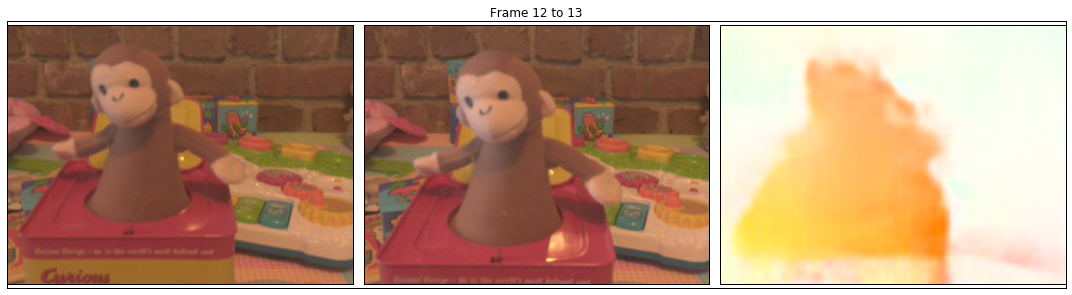

In [3]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image


for i in range(1, 13):
    first_frame_fname = 'ppms/{0:02d}.ppm'.format(i)
    second_frame_fname = 'ppms/{0:02d}.ppm'.format(i+1)
    flow_fname = 'results/colored/{0:02d}-{1:02d}.png'.format(i,i+1)
    first_frame = np.asarray(Image.open(first_frame_fname))
    second_frame = np.asarray(Image.open(second_frame_fname))
    flow = np.asarray(Image.open(flow_fname))
    f = plt.figure(figsize=(15,4), tight_layout=True)
    plt.title('Frame {0:02d} to {1:02d}'.format(i,i+1))
    ax1 = plt.axes()
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)
    sp = f.add_subplot(1,3,1)
    ax1 = sp.axes
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)
    plt.imshow(first_frame)
    sp = f.add_subplot(1,3,2)
    ax1 = sp.axes
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)
    plt.imshow(second_frame)
    sp = f.add_subplot(1,3,3)
    ax1 = sp.axes
    ax1.axes.get_yaxis().set_visible(False)
    ax1.axes.get_xaxis().set_visible(False)
    plt.imshow(flow)
    plt.show()